In [1]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

Define constants

In [2]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

Prepare data

Download data and save it

In [3]:
url = 'https://drive.google.com/file/d/1gjbSZV5NjjIVOqSP-yTCqXcGPX9PnYn5/view?usp=sharing'

In [4]:
!gdown --id 1gjbSZV5NjjIVOqSP-yTCqXcGPX9PnYn5

Downloading...
From: https://drive.google.com/uc?id=1gjbSZV5NjjIVOqSP-yTCqXcGPX9PnYn5
To: /content/MM17-WeiboRumorSet.zip
1.35GB [00:11, 119MB/s]


Unzip and save into folder train_extracted

In [5]:
import zipfile
with zipfile.ZipFile("MM17-WeiboRumorSet.zip","r") as zip_ref:
    zip_ref.extractall("./train_extracted")

Exract labels from image names and save image names with corresponding labels in dataframe

In [6]:
filenames1 = os.listdir("./train_extracted/MM17-WeiboRumorSet/rumor_images")
filenames01 = []
categories1 = []
for filename in filenames1:
    category = 1 # rumor
    categories1.append(1)
    s = "rumor_images/"+str(filename)
    filenames01.append(s)

df1 = pd.DataFrame({
    'filename': filenames01,
    'category': categories1
})

In [7]:
df1.head()

,filename,category
0,rumor_images/005Cp0Zcjw1eqxg1ipc63j30hs0hztah.jpg,1
1,rumor_images/720be4e5gw1eo6jz021qmj20c00e3mxq.jpg,1
2,rumor_images/6a77ebb7jw1ev20xu2excj20p018gn18.jpg,1
3,rumor_images/0062G6IYjw1er1zfiinvhj30wo1407az.jpg,1
4,rumor_images/5d6ed51fjw1eb8s33w2yoj20c808q0u1.jpg,1


In [8]:
len(df1) # number of rumor images

7954

In [9]:
filenames2 = os.listdir("./train_extracted/MM17-WeiboRumorSet/nonrumor_images")
filenames02 = []
categories2 = []
for filename in filenames2:
    category2 = 0 # rumor
    categories2.append(0)
    s = "nonrumor_images/"+str(filename)
    filenames02.append(s)

df2 = pd.DataFrame({
    'filename': filenames02,
    'category': categories2
})

In [10]:
df2.head()

,filename,category
0,nonrumor_images/61ff32dejw1ezpn9odko9j20c80f7m...,0
1,nonrumor_images/66eeadffjw1eyz8i8z3e2j20hs0dcg...,0
2,nonrumor_images/620beb06gw1eyl2duidwcj21e06k4h...,0
3,nonrumor_images/61e6c012jw1ez1r01nnw5j20c81367...,0
4,nonrumor_images/61b8c41ejw1evetlsoyaej20ic0c8t...,0


In [11]:
len(df2) # number of non rumor images

5318

In [12]:
df = df1.append(df2, ignore_index=True).reset_index(drop = True)

In [13]:
df.head()

,filename,category
0,rumor_images/005Cp0Zcjw1eqxg1ipc63j30hs0hztah.jpg,1
1,rumor_images/720be4e5gw1eo6jz021qmj20c00e3mxq.jpg,1
2,rumor_images/6a77ebb7jw1ev20xu2excj20p018gn18.jpg,1
3,rumor_images/0062G6IYjw1er1zfiinvhj30wo1407az.jpg,1
4,rumor_images/5d6ed51fjw1eb8s33w2yoj20c808q0u1.jpg,1


In [14]:
len(df) # combined

13272

In [15]:
df.describe()

,category
count,13272.000000
mean,0.599307
std,0.490057
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [16]:
df.tail()

,filename,category
13267,nonrumor_images/66eeadffjw1eynry0u92vj20m80es7...,0
13268,nonrumor_images/593bbc68gw1ezuivqza5aj20c80cbm...,0
13269,nonrumor_images/6298156bgw1ey7b8tsjeyj20c6099w...,0
13270,nonrumor_images/70e11e0fjw1eww3qmvoiaj20hi0atg...,0
13271,nonrumor_images/0065yqVkjw1ezwqa63fg9j30fa0bgj...,0


Total count

In [17]:
label_counts = df.groupby('category').size()
print(label_counts)

category
0    5318
1    7954
dtype: int64


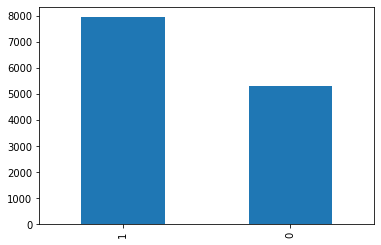

In [18]:
df['category'].value_counts().plot.bar()

Sample image

Shuffle df

In [19]:
# shuffle the DataFrame rows 
df = df.sample(frac = 1).reset_index(drop=True) 

In [20]:
df.head()

,filename,category
0,nonrumor_images/470bf257gw1ezorbcbs9aj20lc0c0t...,0
1,rumor_images/63b0b847jw1e2rdlbdnuwj.jpg,1
2,rumor_images/0062YFN8gw1exg3dg0i8jj30p018gteh.jpg,1
3,rumor_images/980a7dc8gw1dvkxkqn0znj.jpg,1
4,rumor_images/60718250jw1ev0a9owbi5j20c80920su.jpg,1


In [21]:
df.tail()

,filename,category
13267,rumor_images/a7712e8agw1eefiyk7t2tj20c80dv0v4.jpg,1
13268,rumor_images/9ce2639fjw1ev1wo07ypaj20ez0qowig.jpg,1
13269,nonrumor_images/61e6c012jw1ez5so53i4gj20c80c80...,0
13270,rumor_images/442413cfjw1e51di0jwg4j20c807074y.jpg,1
13271,rumor_images/64aa0755tw1ep4c9cot8dj20bc0ef3zi.jpg,1


Make a combined list with rumor and non rumor image paths last part

In [22]:
filenames = []
categories = []
for i in range(0, len(df)):
  filenames.append(str(df['filename'][i]))
  categories.append((df['category'][i]))
print(len(filenames))
print(len(categories))

13272
13272


In [23]:
print(filenames[0])
print(categories[0])
print(filenames[-1])
print(categories[-1])

nonrumor_images/470bf257gw1ezorbcbs9aj20lc0c0tat.jpg
0
rumor_images/64aa0755tw1ep4c9cot8dj20bc0ef3zi.jpg
1


rumor_images/b5c88416jw1es0fexvqjoj20gn0cfmyj.jpg


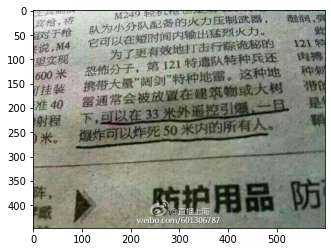

In [24]:
sample = random.choice(filenames)
print(sample)
image = load_img("./train_extracted/MM17-WeiboRumorSet/"+sample)
plt.imshow(image)

##Build Model

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, Input

# Simply importing existing models from keras
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19  import VGG19
from keras.applications.inception_v3  import InceptionV3

# FF + LR

# VGG-16
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS))
vgg16_base.trainable = False # freeze the base model
vgg16 = Sequential([
    vgg16_base,
    Flatten(),
    Dense(4096, activation="relu"),
    Dense(4096, activation="relu"),
    Dense(2, activation='softmax')
])
vgg16.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
vgg16.summary()

# VGG-19
vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
vgg19_base.trainable = False # freeze the base model
vgg19 = Sequential([
    vgg19_base,
    Flatten(),
    Dense(4096, activation="relu"),
    Dense(4096, activation="relu"),
    Dense(2, activation='softmax')
])
vgg19.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
vgg19.summary()

# Inception V3
iv3_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
iv3_base.trainable = False # freeze the base model

inception_v3 = Sequential([
    iv3_base,
    Flatten(),
    Dense(4096, activation='softmax'),
    Dense(2, activation='softmax')
])
inception_v3.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
inception_v3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 4096)              33558528  
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 8194      
Total params: 65,062,722
Trainable params: 50,348,034
Non-trainable params: 14,714,688
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type) 

Callbacks

In [26]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

Early Stop

To prevent over fitting we will stop the learning after 5 epochs and val_loss value not decreased

In [27]:
earlystop = EarlyStopping(patience=5)

Learning Rate Reduction

We will reduce the learning rate when then accuracy not increase for 2 steps

In [28]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

In [29]:
callbacks = [earlystop, learning_rate_reduction]

Prepare data

Because we will use image genaretor with class_mode="categorical". We need to convert column category into string. Then imagenerator will convert it one-hot encoding which is good for our classification.

So we will convert 1 to rumor and 0 to nonrumor

In [30]:
df["category"] = df["category"].replace({0: 'nonrumor', 1: 'rumor'}) 

In [31]:
df.head()

,filename,category
0,nonrumor_images/470bf257gw1ezorbcbs9aj20lc0c0t...,nonrumor
1,rumor_images/63b0b847jw1e2rdlbdnuwj.jpg,rumor
2,rumor_images/0062YFN8gw1exg3dg0i8jj30p018gteh.jpg,rumor
3,rumor_images/980a7dc8gw1dvkxkqn0znj.jpg,rumor
4,rumor_images/60718250jw1ev0a9owbi5j20c80920su.jpg,rumor


Divide into 80% train and 20% test, Note that we have shuffled earlier

In [32]:
mid = int(len(df)*.8)
df_train = df[:mid]
df_test = df[mid:]
print(len(df_train))
print(len(df_test))

10617
2655


In [33]:
train_df, validate_df = train_test_split(df_train, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

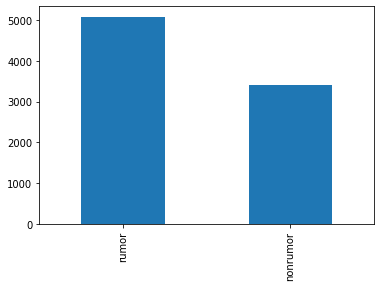

In [34]:
train_df['category'].value_counts().plot.bar()

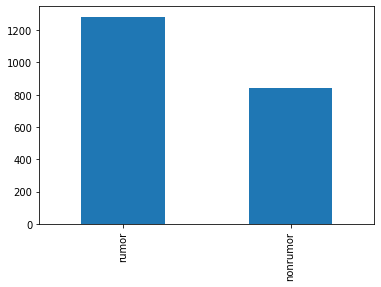

In [35]:
validate_df['category'].value_counts().plot.bar()

In [36]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=32

Traning Generator

In [37]:
# train_datagen = ImageDataGenerator(rescale=1./255)

train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "./train_extracted/MM17-WeiboRumorSet/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 8476 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 17 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Validation Generator

In [38]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "./train_extracted/MM17-WeiboRumorSet/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 2120 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 4 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


See how our training generator work

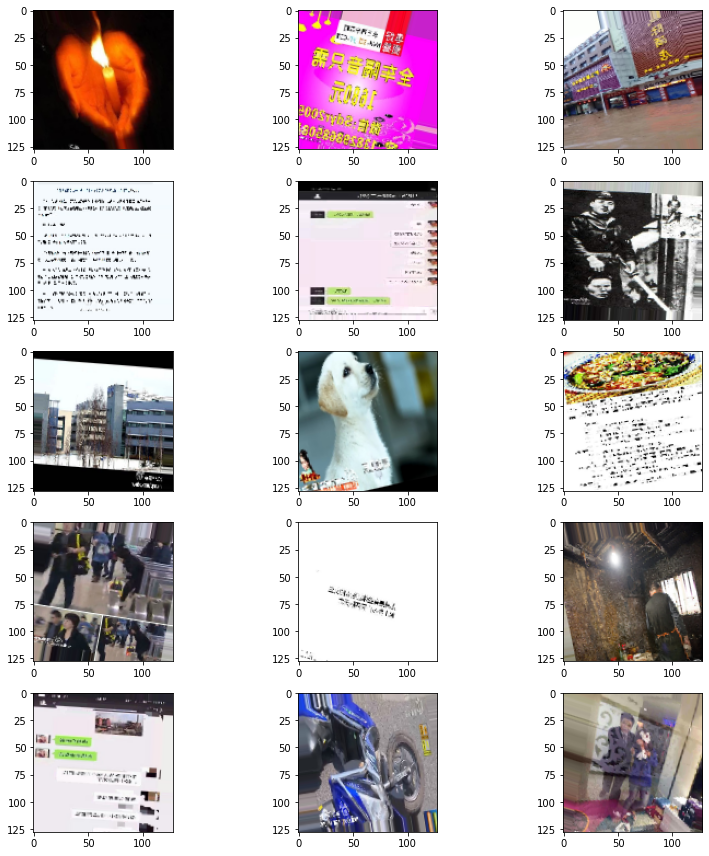

In [39]:
plt.figure(figsize=(12, 12))
i = 0
for X_batch, Y_batch in train_generator:
    plt.subplot(5, 3, i+1)
    image = X_batch[0]
    plt.imshow(image)
    i += 1
    if i >= 15: break
plt.tight_layout()
plt.show()

Fit Model

In [40]:
FAST_RUN = False

In [41]:
epochs=3 if FAST_RUN else 5 # since the model is pretrained, 5 epochs are enough, we tried 15 earlier but it perfromed
# poorly on validation set as epoch increased. Let's keep epochs low this time.

In [42]:
history_vgg16 = vgg16.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
265/265 [==============================] - 109s 412ms/step - loss: 2.0163 - accuracy: 0.5867 - val_loss: 0.6170 - val_accuracy: 0.6354
Epoch 2/5
265/265 [==============================] - 108s 406ms/step - loss: 0.6299 - accuracy: 0.6352 - val_loss: 0.5869 - val_accuracy: 0.6657
Epoch 3/5
265/265 [==============================] - 108s 406ms/step - loss: 0.6050 - accuracy: 0.6630 - val_loss: 0.5811 - val_accuracy: 0.6605
Epoch 4/5
265/265 [==============================] - 108s 406ms/step - loss: 0.5861 - accuracy: 0.6784 - val_loss: 0.6093 - val_accuracy: 0.7116
Epoch 5/5
265/265 [==============================] - 107s 406ms/step - loss: 0.5780 - accuracy: 0.6896 - val_loss: 0.5953 - val_accuracy: 0.6880


In [43]:
history_vgg19 = vgg19.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/5
265/265 [==============================] - 110s 416ms/step - loss: 2.2642 - accuracy: 0.5670 - val_loss: 0.6293 - val_accuracy: 0.6392
Epoch 2/5
265/265 [==============================] - 108s 409ms/step - loss: 0.6475 - accuracy: 0.6232 - val_loss: 0.6035 - val_accuracy: 0.6496
Epoch 3/5
265/265 [==============================] - 109s 409ms/step - loss: 0.6235 - accuracy: 0.6426 - val_loss: 0.5932 - val_accuracy: 0.6624
Epoch 4/5
265/265 [==============================] - 108s 409ms/step - loss: 0.6038 - accuracy: 0.6678 - val_loss: 0.6270 - val_accuracy: 0.6496
Epoch 5/5
265/265 [==============================] - 108s 406ms/step - loss: 0.5972 - accuracy: 0.6711 - val_loss: 0.5846 - val_accuracy: 0.6795


In [44]:
history_iv3 = inception_v3.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/5
265/265 [==============================] - 106s 399ms/step - loss: 0.6769 - accuracy: 0.5972 - val_loss: 0.6719 - val_accuracy: 0.6037
Epoch 2/5
265/265 [==============================] - 105s 395ms/step - loss: 0.6741 - accuracy: 0.5976 - val_loss: 0.6715 - val_accuracy: 0.6037
Epoch 3/5
265/265 [==============================] - ETA: 0s - loss: 0.6739 - accuracy: 0.5976
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
265/265 [==============================] - 104s 393ms/step - loss: 0.6739 - accuracy: 0.5976 - val_loss: 0.6717 - val_accuracy: 0.6027
Epoch 4/5
265/265 [==============================] - 104s 394ms/step - loss: 0.6735 - accuracy: 0.5976 - val_loss: 0.6680 - val_accuracy: 0.6046
Epoch 5/5
265/265 [==============================] - 103s 390ms/step - loss: 0.6672 - accuracy: 0.5976 - val_loss: 0.6599 - val_accuracy: 0.6032


Save Model

In [45]:
vgg16.save_weights("vgg16.h5")
vgg19.save_weights("vgg19.h5")
inception_v3.save_weights("inception_v3.h5")

Visualize Training

VGG-16


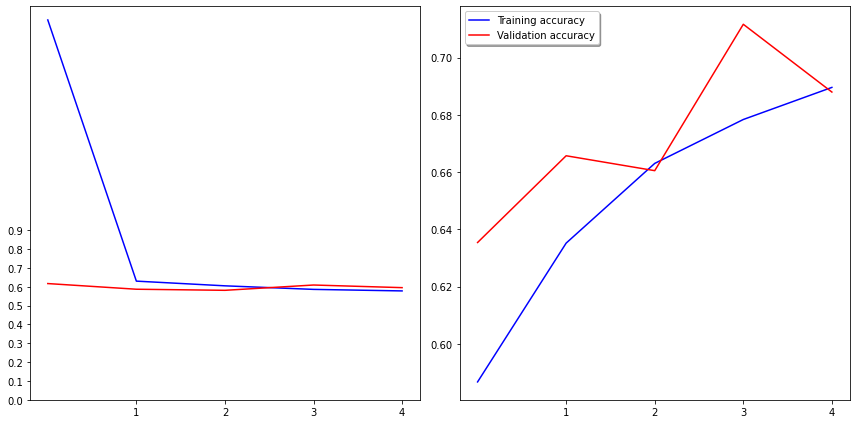

VGG-19


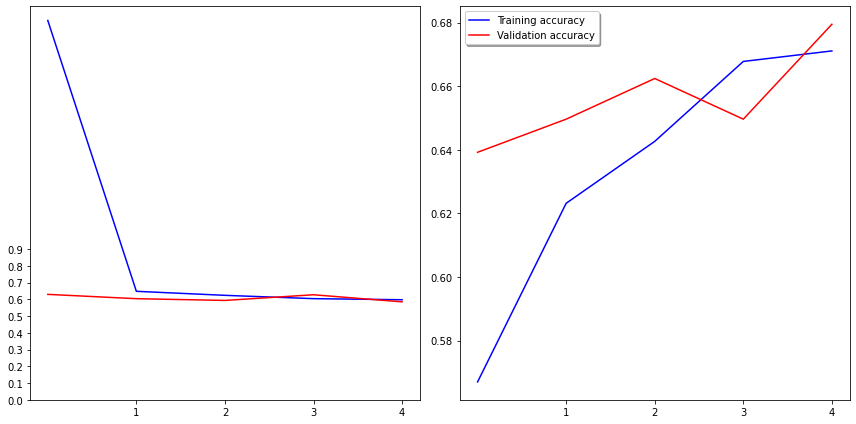

Inception V3


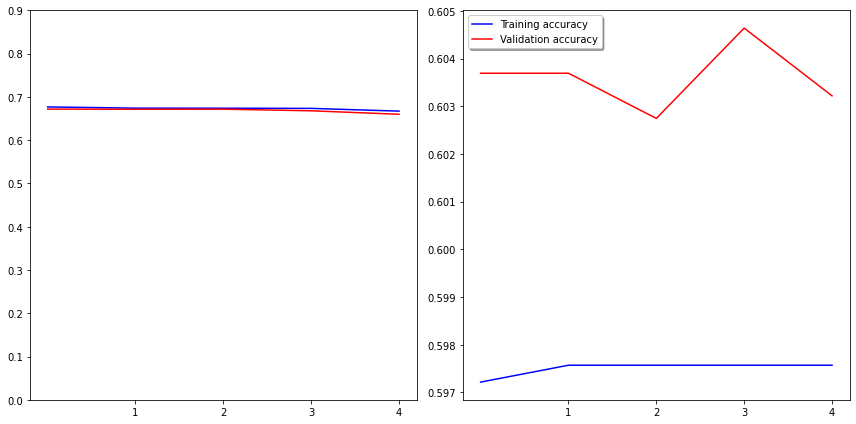

In [46]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.plot(history.history['loss'], color='b', label="Training loss")
    ax1.plot(history.history['val_loss'], color='r', label="validation loss")
    ax1.set_xticks(np.arange(1, epochs, 1))
    ax1.set_yticks(np.arange(0, 1, 0.1))

    ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
    ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
    ax2.set_xticks(np.arange(1, epochs, 1))

    legend = plt.legend(loc='best', shadow=True)
    plt.tight_layout()
    plt.show()

print("VGG-16")
plot_history(history_vgg16)
print("VGG-19")
plot_history(history_vgg19)
print("Inception V3")
plot_history(history_iv3)

Prepare Testing Data

In [47]:
df_test.head()

,filename,category
10617,rumor_images/86a18379jw1dwo9uq5byjj.jpg,rumor
10618,rumor_images/4b9a3939jw1e78pkwtvh5j20c80nywic.jpg,rumor
10619,nonrumor_images/593bbc68gw1eygh1wu19jj20b40b4a...,nonrumor
10620,nonrumor_images/593bbc68gw1ez4r9j7u9sj20c806jj...,nonrumor
10621,rumor_images/005Fnp6Ajw1el6xt5yvbsj308c06d74a.jpg,rumor


In [48]:
df_test = df_test.reset_index(drop = True)

In [49]:
test_filenames = []
test_categories = []
for i in range(0,len(df_test)):
  test_filenames.append(df_test['filename'][i])
  test_categories.append(df_test['category'][i])
print(len(test_filenames))

2655


In [50]:
test_df = df_test
nb_samples = test_df.shape[0]

Create Testing Generator

In [51]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "./train_extracted/MM17-WeiboRumorSet/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False,
    validate_filenames=False
)

Found 2655 non-validated image filenames.


Predict

In [52]:
predict_vgg16 = vgg16.predict(test_generator, steps=np.ceil(nb_samples/batch_size))
predict_vgg19 = vgg19.predict(test_generator, steps=np.ceil(nb_samples/batch_size))
predict_iv3 = inception_v3.predict(test_generator, steps=np.ceil(nb_samples/batch_size))

For categoral classication the prediction will come with probability of each category. So we will pick the category that have the highest probability with numpy average max

In [53]:
y_vgg16 = np.argmax(predict_vgg16, axis=-1)
y_vgg19 = np.argmax(predict_vgg19, axis=-1)
y_iv3 = np.argmax(predict_iv3, axis=-1)

y_true = test_df["category"].replace({'nonrumor': 0, 'rumor': 1}) 

In [54]:
test_df["vgg16"] = np.argmax(predict_vgg16, axis=-1)
test_df["vgg19"] = np.argmax(predict_vgg19, axis=-1)
test_df["iv3"] = np.argmax(predict_iv3, axis=-1)

In [55]:
from sklearn.metrics import accuracy_score # normal accuracy
from sklearn.metrics import balanced_accuracy_score # used in case of imbalanced data sets, average of recall, from 0 to 1
from sklearn.metrics import confusion_matrix # division of performance on the multilabels
from sklearn.metrics import cohen_kappa_score # compares model against random prediction, from -1 to 1
from sklearn.metrics import classification_report # for multilabel classification, gives precision, recall, f score, support, more
target_names = ['class 0', 'class 1']

def print_metrics(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Balanced Accuracy:" , balanced_accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Cohen Kappa Score:", cohen_kappa_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred, target_names=target_names))
    
print('VGG-16')
print_metrics(y_true, y_vgg16)
print('VGG-19')
print_metrics(y_true, y_vgg19)
print('Inception_V3')
print_metrics(y_true, y_iv3)

VGG-16
Accuracy: 0.6659133709981168
Balanced Accuracy: 0.6796742260640403
Confusion Matrix:
 [[799 267]
 [620 969]]
Cohen Kappa Score: 0.34077741732582345
Classification Report:
               precision    recall  f1-score   support

     class 0       0.56      0.75      0.64      1066
     class 1       0.78      0.61      0.69      1589

    accuracy                           0.67      2655
   macro avg       0.67      0.68      0.66      2655
weighted avg       0.70      0.67      0.67      2655

VGG-19
Accuracy: 0.6587570621468927
Balanced Accuracy: 0.6017546169313656
Confusion Matrix:
 [[ 333  733]
 [ 173 1416]]
Cohen Kappa Score: 0.22276814390791466
Classification Report:
               precision    recall  f1-score   support

     class 0       0.66      0.31      0.42      1066
     class 1       0.66      0.89      0.76      1589

    accuracy                           0.66      2655
   macro avg       0.66      0.60      0.59      2655
weighted avg       0.66      0.66      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
# saving the dataframe of our results
from google.colab import files
test_df.to_csv('test_df_5331.csv') 
files.download('test_df_5331.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>